In [22]:
def plotGraph(personalCode, weighted, directed, algo=0):
    """
    weighted: Boolean
    directed: Boolean
    algo:     Int
    
    Ref:
    https://networkx.org/documentation/latest/reference/classes/index.html
    https://networkx.org/documentation/latest/reference/drawing.html#module-networkx.drawing.layout
    https://networkx.org/documentation/latest/auto_examples/drawing/plot_labels_and_colors.html?highlight=color
    https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
    """
    import networkx as nx
    import pylab
    import numpy as np

    assert 0 <= algo <= 5
    
    "Creating a directed/undirected graph G"
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    
    "Interpreting the 16-digit code as edges and adding them into graph G"
    for node in range(len(code) - 1):
        node1 = int(code[node])
        node2 = int(code[node+1])
        weight = np.abs(node1 - node2)
        G.add_edges_from([(node1,node2)], weight=weight)
    
    "Chosing a algorithms for placing nodes on a plan"
    if algo == 0:
        pos = nx.shell_layout(G)
    elif algo == 1:
        pos = nx.circular_layout(G)
    elif algo == 2:
        pos = nx.kamada_kawai_layout(G)
    elif algo == 3:
        pos = nx.spectral_layout(G)
    elif algo == 4:
        pos = nx.spiral_layout(G)
    elif algo == 5:
        pos = nx.random_layout(G)
    
    "Adding labels of weighted on the figure for weighted graph"
    if weighted:
        edge_labels = dict([((u,v,), d['weight']) for u,v,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    "Plotting graph G on a figure"
    nx.draw(G, pos, 
            edge_color='black', 
            edgecolors="tab:gray", 
            node_color='white', node_size=500, with_labels=True)
    pylab.show()

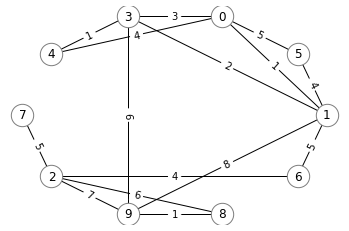

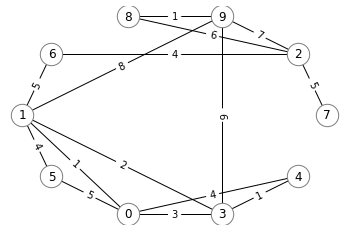

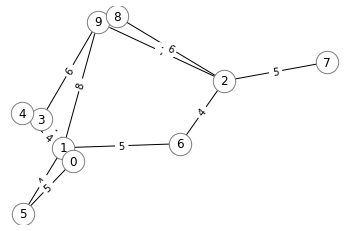

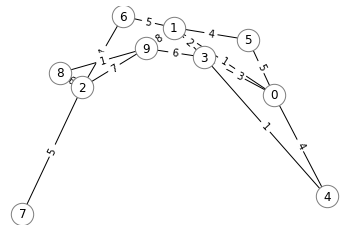

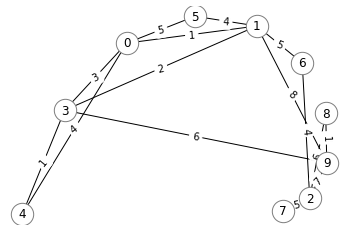

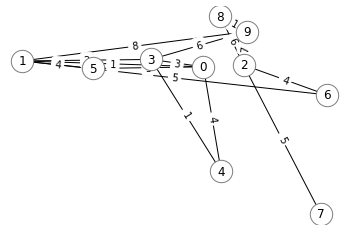

In [23]:
code = '7298261503910431'
for algo in range(6):
    plotGraph(code, weighted=True, directed=False, algo=algo)